# convolutions

[reference](https://beckernick.github.io/convolutions/)

In [9]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import StringIO
import io

In [17]:
response = requests.get('http://vignette2.wikia.nocookie.net/grayscale/images/4/47/Lion.png/revision/latest?cb=20130926182831')
print(len(response.content))
# lion_arr = np.array(Image.open(StringIO(response.content)))
# lion_arr = np.genfromtxt(io.BytesIO(response.content))
lion_arr = np.array(Image.open(io.BytesIO(response.content)))


103511


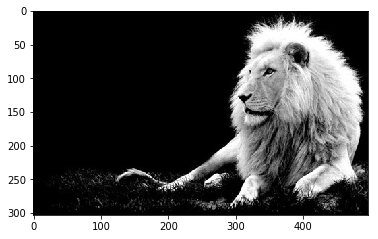

In [13]:
plt.imshow(lion_arr)

In [14]:
print(lion_arr.shape)
print(np.array_equal(lion_arr[:, :, 0], lion_arr[:, :, 1]))
print(np.array_equal(lion_arr[:, :, 1], lion_arr[:, :, 2]))

(303, 497, 3)
True
True


In [18]:
lion_arr = lion_arr[:, :, 0]

In [20]:
lion_arr[:200, :400]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  2,   2,   1, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,   5,  86,  97],
       [  0,   1,   0, ...,  56, 114, 114],
       [  0,   1,   0, ..., 122, 130, 143]], dtype=uint8)

In [23]:
padded_array = np.pad(lion_arr, (1, 1), 'constant')
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output_array = np.zeros(lion_arr.shape)

for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

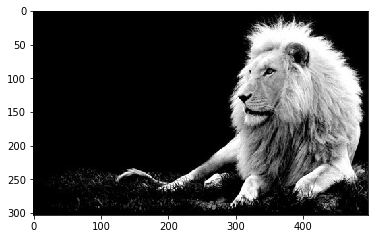

In [24]:
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

In [27]:
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            #print temp_array.shape
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Edge Detection

In [28]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

lion_transf_edge1 = conv_2d_kernel(lion_arr, kernel = edge_kernel_1, squash_pixels = True)
lion_transf_edge2 = conv_2d_kernel(lion_arr, kernel = edge_kernel_2, squash_pixels = True)
lion_transf_edge3 = conv_2d_kernel(lion_arr, kernel = edge_kernel_3, squash_pixels = True)

(-0.5, 496.5, 302.5, -0.5)

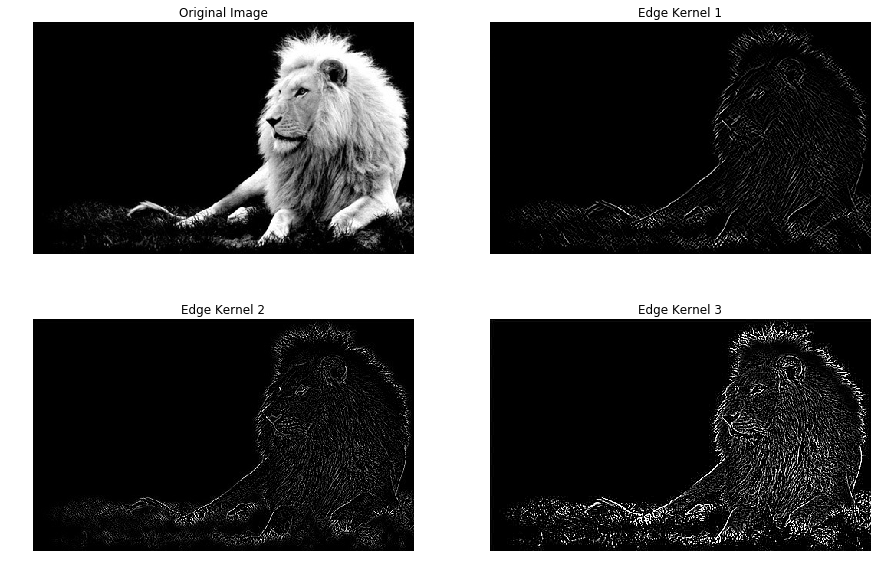

In [30]:
f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')
ax_array[0, 1].imshow(lion_transf_edge1, cmap = plt.get_cmap('gray'))
ax_array[0, 1].set_title('Edge Kernel 1')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(lion_transf_edge2, cmap = plt.get_cmap('gray'))
ax_array[1, 0].set_title('Edge Kernel 2')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(lion_transf_edge3, cmap = plt.get_cmap('gray'))
ax_array[1, 1].set_title('Edge Kernel 3')
ax_array[1, 1].axis('off')

## Sharpen

In [31]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

unsharp_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / -256

lion_transf_sharpen = conv_2d_kernel(lion_arr, kernel = sharpen_kernel, squash_pixels = True)
lion_transf_unsharp = conv_2d_kernel(lion_arr, kernel = unsharp_kernel, squash_pixels = True)

(-0.5, 496.5, 302.5, -0.5)

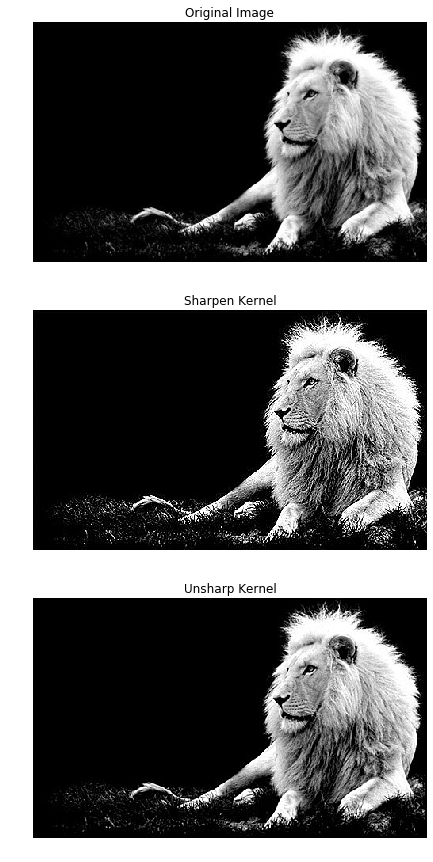

In [32]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)
ax_array[0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(lion_transf_sharpen, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Sharpen Kernel')
ax_array[1].axis('off')
ax_array[2].imshow(lion_transf_unsharp, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Unsharp Kernel')
ax_array[2].axis('off')

## Blur

In [33]:
blur_box_kernel = np.ones((3, 3)) / 9
blur_gaussian_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16

lion_transf_blur_box = conv_2d_kernel(lion_arr, kernel = blur_box_kernel, squash_pixels = True)
lion_transf_blur_gaussian = conv_2d_kernel(lion_arr, kernel = blur_gaussian_kernel, squash_pixels = True)


(-0.5, 496.5, 302.5, -0.5)

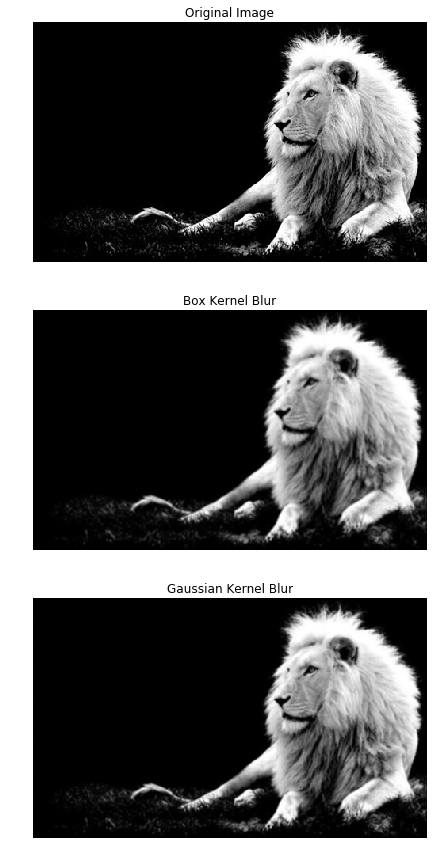

In [34]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')
ax_array[1].imshow(lion_transf_blur_box, cmap = plt.get_cmap('gray'))
ax_array[1].set_title('Box Kernel Blur')
ax_array[1].axis('off')
ax_array[2].imshow(lion_transf_blur_gaussian, cmap = plt.get_cmap('gray'))
ax_array[2].set_title('Gaussian Kernel Blur')
ax_array[2].axis('off')


## Convolution in Tensorflow

In [35]:
lion_array_4d = lion_arr.reshape(-1, 303, 497, 1)
blur_kernel_4d = blur_box_kernel.reshape(3, 3, 1, 1)

In [36]:
import tensorflow as tf

graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(lion_array_4d, dtype = np.float32))
    tf_blur_kernel = tf.Variable(np.array(blur_kernel_4d, dtype = np.float32))    
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')

with tf.Session(graph = graph) as sess:
    tf.initialize_all_variables().run()
    transformed_image = tf_convolution_output.eval()
    transformed_image = transformed_image[0, :, :, 0]


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [37]:
np.testing.assert_array_almost_equal(lion_transf_blur_box, transformed_image, decimal = 4)


(-0.5, 496.5, 302.5, -0.5)

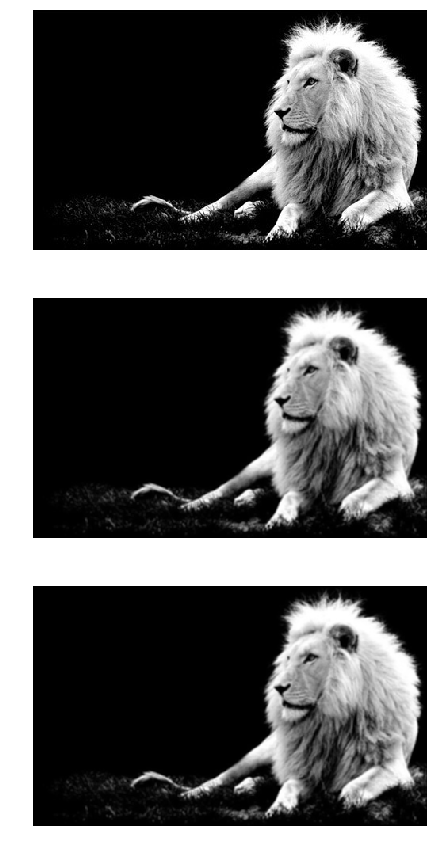

In [38]:
f, ax_array = plt.subplots(3, 1)
f.set_figheight(15)
f.set_figwidth(12)
ax_array[0].imshow(lion_arr, cmap = plt.get_cmap('gray'))
ax_array[0].axis('off')
ax_array[1].imshow(lion_transf_blur_box, cmap = plt.get_cmap('gray'))
ax_array[1].axis('off')
ax_array[2].imshow(transformed_image, cmap = plt.get_cmap('gray'))
ax_array[2].axis('off')